In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile

In [2]:
train_df = pd.read_csv('../data/train.csv')

In [3]:
train_df.head()

,fn,label
0,audio_files/IV38R7F.wav,akawuka
1,audio_files/KM4SKWT.wav,banana
2,audio_files/F5POSU9.wav,obulwadde
3,audio_files/MMVDXG2.wav,nnyaanya
4,audio_files/9TVM96F.wav,pampu


In [4]:
from pathlib import Path

data_dir = Path('../data')

In [5]:
from tqdm import tqdm

lengths = []
sample_rates = []
for item in tqdm(train_df['fn'].values):
    rate, sample = wavfile.read(data_dir / item)
    sample_rates.append(rate)
    lengths.append(len(sample))

100%|██████████| 1109/1109 [00:00<00:00, 7841.21it/s]


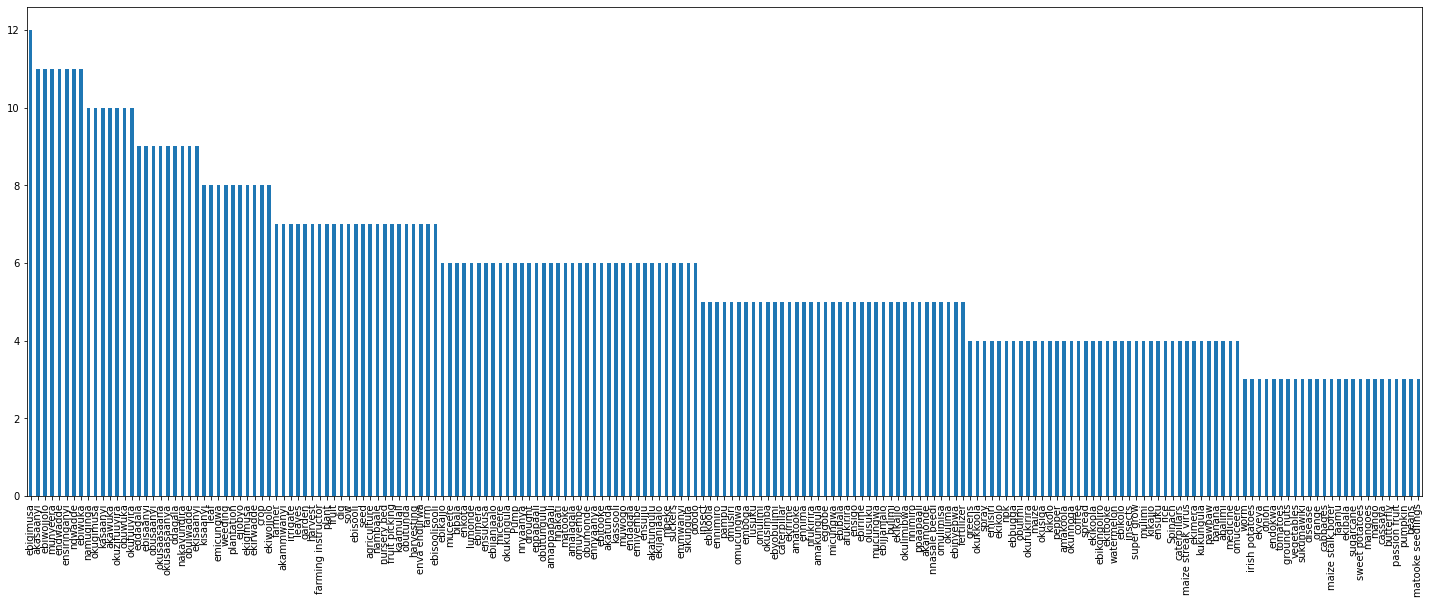

In [12]:
fig, ax = plt.subplots(figsize=(25, 9))
train_df['label'].value_counts().plot(kind='bar', ax=ax);

In [15]:
train_df['label'].nunique()

193

In [13]:
np.unique(lengths), np.unique(sample_rates)

(array([22491, 23814, 29106, 43659, 51597, 52920, 54243, 54749, 55005,
        55069, 55133, 55197, 55239, 55261, 55298, 55325, 55389, 55453,
        55475, 55566, 58212, 60858]),
 array([22050]))

In [14]:
pd.Series(lengths).value_counts()

54243    917
55261     62
55325     49
55566     18
55239     12
55197      9
55069      8
55133      7
55389      7
55298      5
55453      3
55475      2
23814      1
22491      1
60858      1
43659      1
29106      1
51597      1
54749      1
52920      1
55005      1
58212      1
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(train_df, stratify=train_df['label'], test_size=0.3)

In [17]:
len(train)

776

In [20]:
val['label'].nunique()

193

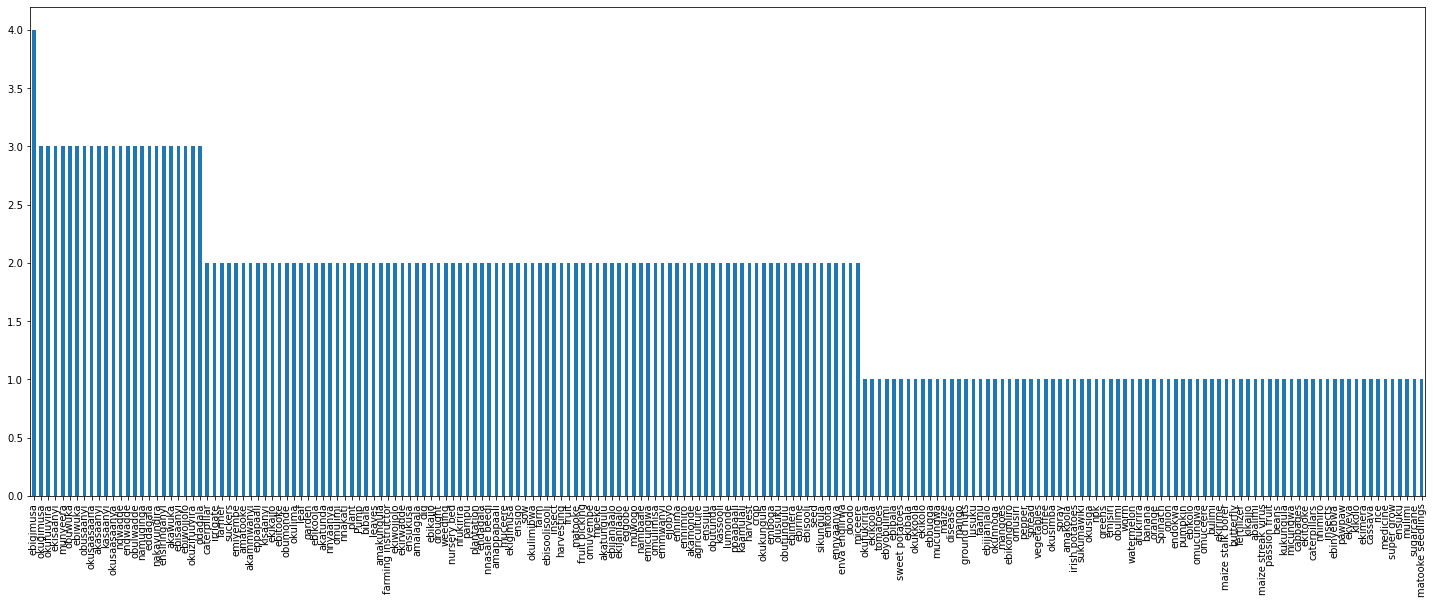

In [23]:
fig, ax = plt.subplots(figsize=(25, 9))
val['label'].value_counts().plot(kind='bar', ax=ax);